In [2]:
import numpy as np
import math
# random horizon and simulate the data as it goes
# this function simulate 1 batch of not strictly K numbers of X_n, given fixed Lambda, P, Alpha
# @ param N: is the number of total population
# @ param current_time: a number that is the current time when starting the batch simulation
# @ param x_0: initial infected patients (greater than 0)
# @ param K: is total time for this simulation
# @ param maxi_time: is the maximum time that the whole simulation process can go, can be infinity
# @ param H: is the hospital capacity
def simulation_infected(la, p, al, N, current_time, x_0, K, H, maxTime):
    # initialize time and infected patient
    t_0 = 0
    # bind variables to initial conditions
    x_n = x_0
    # make sure the start is not 0
    assert(x_n!=0)
    # assign time now to 0 first for convenience of bound the simulation size close to K 
    # But in the return statement, add it up to the current time
    t_n = current_time
    # introduce T_H := the total time above the hospital capacity
    T_H = 0
    # initiate X_n process and corresponding T_n process
    X_n = []
    T_n = []
    # k is to keep track of current observation in up tp K(batch size measured by time)
    k = 0
    # loop
    # break condition
    # @ condition1: when the time exceeds the maximum time
    # @ condition2: when the infected patients go to zero
    # @ condition3: when the whole populations are infected! :(
    while (t_n<maxTime and
           x_n != 0 and
           x_n < N and
           k < K
          ):
        i = x_n
        # q i _ i+1
        q_forward_i = la*p*2*x_n*(N-i)/(N*(N-1))
        # q i _ i-1
        q_backward_i = al*i
        # waiting time rate v_i = (q i _ i+1) + (q i _ i-1)
        v_i = q_forward_i + q_backward_i
        t_i = np.random.exponential(v_i)
        # calculate T_H before jumping
        if (x_n >= H):
            T_H += t_i
        # jumping probability to STATE i+1 is (q i _ i+1)/v_i
        jump = np.random.binomial(n=1,p=(q_forward_i/v_i))
        if (jump ==1):
            x_n += 1
        elif (jump == 0):
            x_n -= 1            
        # add the jumped X_n at t_i time
        X_n.append(x_n)
        # increase time
        T_n.append(t_n+t_i)
        t_n = t_n+t_i
        # return when the total time for this batch simulation exceeds K
        # as such, the batch is not strictly equal to K ? might need to discuss
        if ((t_n-current_time) > K):
            return X_n, T_n, T_H,t_n-current_time
    # return when the while break condition met    
    return X_n, T_n, T_H, t_n-current_time

In [59]:
# use sequential simulation
def update_lambda(_lambda, T_H, T, Beta ,stepsize):
    Y_n = T_H/T
    _lambda -= float(stepsize) * (Y_n-Beta)
    return _lambda

def update_alpha(_alpha, T_H, T, Beta ,stepsize):
    Y_n = T_H/T
    _alpha += float(stepsize) * (Y_n-Beta)
    return _alpha

# @ x_n initial infected patient
# set initial lambda
# set inital alpha
# @ C is the hospital capacity 
# @ Beta is the target tracking probability 
# @ K is the batch size of each estimate
# these are all set arbitary atm
x_n, _lambda,_alpha,p, K, H, Beta, N, maxTime = (10,
                                                    0.1,
                                                    1e-8,
                                                    0.9,
                                                    1,
                                                    2e4,
                                                    0.05,
                                                    4e6,
                                                    30000)

stepsize = [0.0001, 2e-9]


trajectory_lambda = []
trajectory_alpha = []
trajectory_X_n = []
trajectory_T_n = []
# use iteration of 5000 as end of all sequential update
iteration = 0
t_n = 0
while iteration < 50000:
    # update alpha
    X_n, T_n, T_H, T = simulation_infected(_lambda,p,_alpha,N,t_n,x_n,K,H,maxTime)
#     print(_alpha)
#     print(len(X_n))
#     print("###############")
#     print(T_H/T)
    _alpha = max(0,update_alpha(_alpha,T_H,T,Beta,stepsize[1]))
    trajectory_alpha.append(_alpha)
    trajectory_X_n.extend(X_n)
    trajectory_T_n.extend(T_n)
    
    # to keep the time consistent, slice the tail of last number of infected
    # as the new initial
    x_n = X_n[-1]
    t_n = T_n[-1]
    
    # tn is the re-asigned value from update alpha simulation
    # update lambda
    X_n, T_n, T_H, T = simulation_infected(_lambda,p,_alpha,N,t_n,x_n,K,H,maxTime)
#     print("***************")
#     print(X_n)
    _lambda = max(0, update_lambda(_lambda,T_H,T,Beta,stepsize[0]))
    
    trajectory_lambda.append(_lambda)
    trajectory_X_n.extend(X_n)
    trajectory_T_n.extend(T_n)
    
    x_n = X_n[-1]
    t_n = T_n[-1]
    
    iteration+=1
    

AssertionError: 

In [ ]:
import matplotlib.pyplot as plt

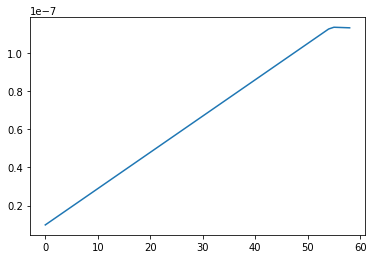

In [57]:
plt.plot(trajectory_alpha)

In [ ]:
plt.plot(trajectory_lambda)

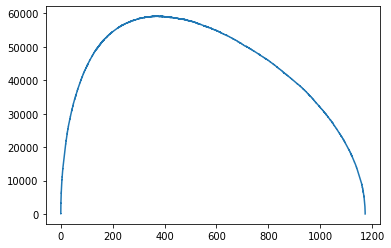

In [58]:
plt.plot(trajectory_T_n,trajectory_X_n)

In [44]:
# use the same simulation
def update_lambda(_lambda, T_H, T, Beta ,stepsize):
    Y_n = T_H/T
    _lambda -= float(stepsize) * (Y_n-Beta)
    return _lambda

def update_alpha(_alpha, T_H, T, Beta ,stepsize):
    Y_n = T_H/T
    _alpha += float(stepsize) * (Y_n-Beta)
    return _alpha

# @ x_n initial infected patient
# set initial lambda
# set inital alpha
# @ C is the hospital capacity 
# @ Beta is the target tracking probability 
# @ K is the batch size of each estimate
# these are all set arbitary atm
x_n, _lambda,_alpha,p, K, H, Beta, N, maxTime = (10,
                                                    0.1,
                                                    1e-8,
                                                    0.9,
                                                    1,
                                                    2e4,
                                                    0.05,
                                                    4e6,
                                                    30000)

stepsize = [0.0001, 2e-9]


trajectory_lambda = []
trajectory_alpha = []
trajectory_X_n = []
trajectory_T_n = []
# use iteration of 5000 as end of all sequential update
iteration = 0
t_n = 0
while iteration < 50000:
    # update alpha
    X_n, T_n, T_H, T = simulation_infected(_lambda,p,_alpha,N,t_n,x_n,K,H,maxTime)
#     print(_alpha)
#     print(len(X_n))
#     print("###############")
#     print(T_H/T)
    _alpha = max(0,update_alpha(_alpha,T_H,T,Beta,stepsize[1]))
    _lambda = max(0, update_lambda(_lambda,T_H,T,Beta,stepsize[0]))
    trajectory_alpha.append(_alpha)
    trajectory_lambda.append(_lambda)
    trajectory_X_n.extend(X_n)
    trajectory_T_n.extend(T_n)
    
    # to keep the time consistent, slice the tail of last number of infected
    # as the new initial
    x_n = X_n[-1]
    t_n = T_n[-1]
    
    iteration+=1
    

AssertionError: 

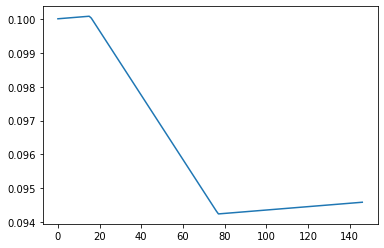

In [49]:
plt.plot(trajectory_lambda)

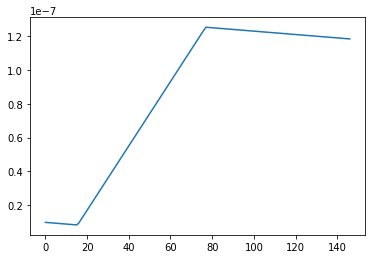

In [48]:
plt.plot(trajectory_alpha)

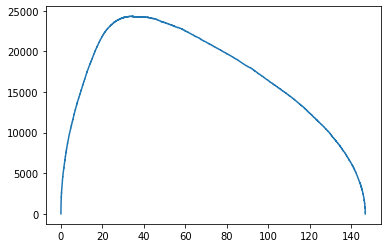

In [47]:
plt.plot(trajectory_T_n,trajectory_X_n)